In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [5]:
df.drop(columns=["Unnamed: 0","x","y","z"],inplace=True)
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [6]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [8]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
df.describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


## Univariate Analysis

<Axes: ylabel='count'>

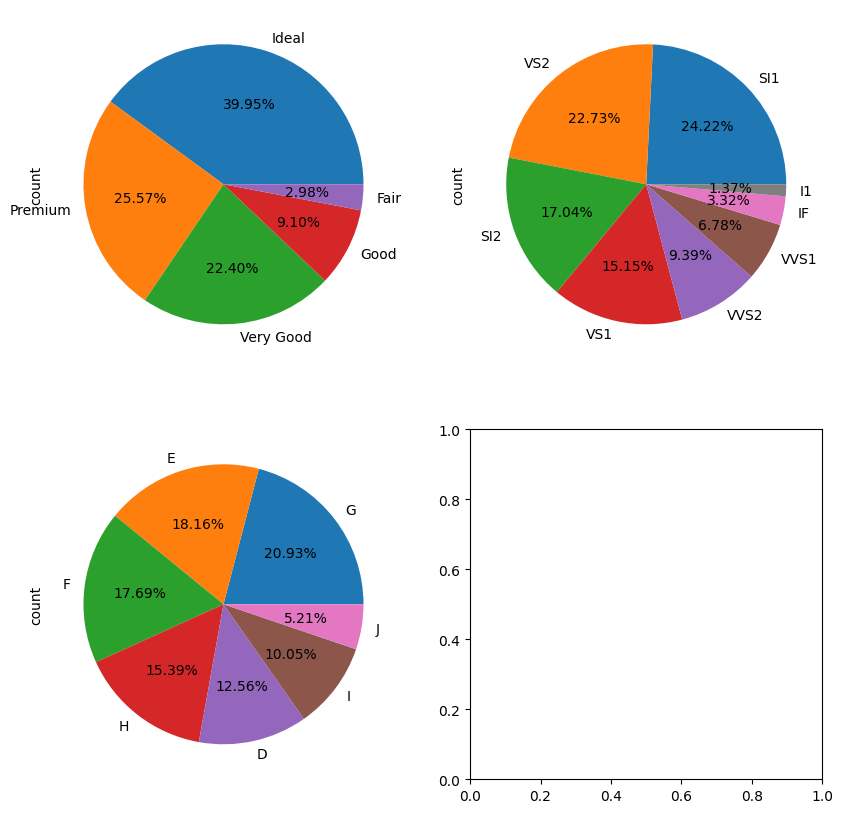

In [10]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
df["cut"].value_counts().plot(kind="pie",autopct="%0.2f%%",ax=axes[0,0])
df["clarity"].value_counts().plot(kind="pie",autopct="%0.2f%%",ax=axes[0,1])
df["color"].value_counts().plot(kind="pie",autopct="%0.2f%%",ax=axes[1,0])

<Axes: xlabel='color', ylabel='price'>

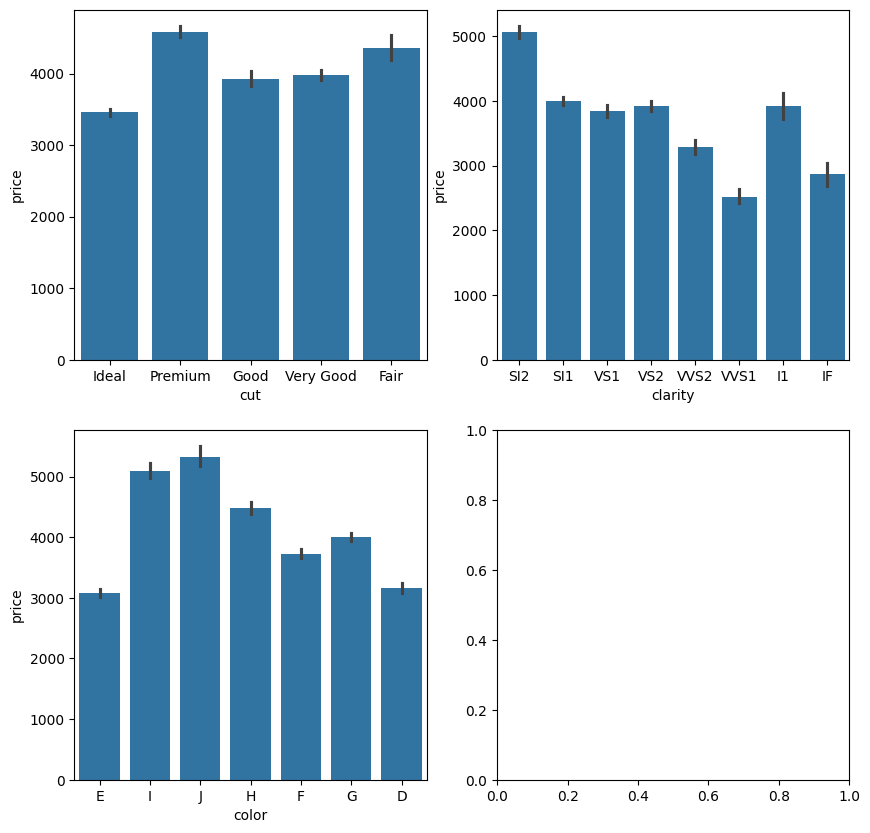

In [11]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.barplot(data=df, x="cut", y='price',ax=axes[0,0])
sns.barplot(data=df, x="clarity", y='price',ax=axes[0,1])
sns.barplot(data=df, x="color", y='price',ax=axes[1,0])


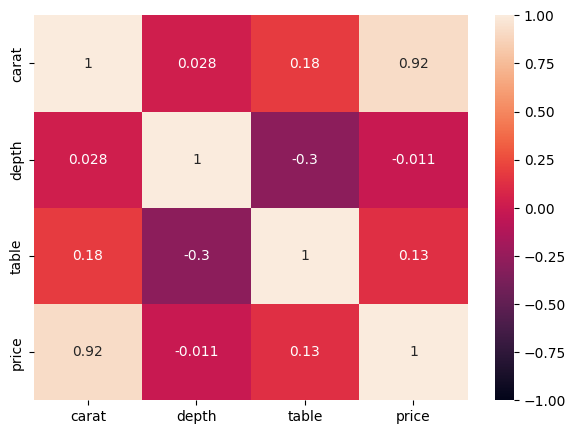

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(df.drop(["cut","clarity","color"],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [13]:
#seperating input and target variable
x=df.drop("price",axis=1)
y=df["price"]

In [14]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40455, 6) (40455,)
(13485, 6) (13485,)


In [15]:
#seperating num and cat columns
x_train_cat=x_train.select_dtypes(include=["object"])
x_train_num=x_train.select_dtypes(include=["int64","float64"])

In [16]:
#rescaling numeric features
from sklearn.preprocessing import MinMaxScaler
MinMax_scalar=MinMaxScaler()
#data converted to a nd numpy array
x_train_num_transformed=pd.DataFrame(MinMax_scalar.fit_transform(x_train_num),columns=MinMax_scalar.get_feature_names_out(),index=x_train_num.index)
x_train_num_transformed.head()

,carat,depth,table
441,0.143451,0.477778,0.444444
50332,0.103950,0.583333,0.277778
35652,0.022869,0.547222,0.388889
9439,0.145530,0.536111,0.444444
15824,0.168399,0.488889,0.527778


In [17]:
#one hot encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")      #handle_unknown=ignore only takes teh values which are in train data the test data values are ignored
x_train_cat_transformed=pd.DataFrame(onehot_encoder.fit_transform(x_train_cat),
                                     columns=onehot_encoder.get_feature_names_out(),index=x_train_cat.index)
print("shape of the data before transformation=",x_train_cat.shape)
print("shape of the data after transformation=",x_train_cat_transformed.shape)
x_train_cat_transformed.head()

shape of the data before transformation= (40455, 3)
shape of the data after transformation= (40455, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
x_train_transformed=pd.concat([x_train_num_transformed,x_train_cat_transformed],axis=1)
x_train_transformed.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
441,0.143451,0.477778,0.444444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50332,0.103950,0.583333,0.277778,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35652,0.022869,0.547222,0.388889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9439,0.145530,0.536111,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15824,0.168399,0.488889,0.527778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#x_test
x_test_cat=x_test.select_dtypes(include=["object"])
x_test_num=x_test.select_dtypes(include=["int64","float64"])

In [20]:
x_test_num_transformed=pd.DataFrame(MinMax_scalar.fit_transform(x_test_num),columns=MinMax_scalar.get_feature_names_out(),index=x_test_num.index)
x_test_num_transformed.head()

,carat,depth,table
10176,0.229008,0.608108,0.215686
16083,0.277354,0.628378,0.235294
13420,0.254453,0.577703,0.274510
20407,0.330789,0.570946,0.235294
8909,0.178117,0.597973,0.254902


In [21]:
x_test_cat_transformed=pd.DataFrame(onehot_encoder.fit_transform(x_test_cat),
                                     columns=onehot_encoder.get_feature_names_out(),index=x_test_cat.index)
print("shape of the data before transformation=",x_test_cat.shape)
print("shape of the data after transformation=",x_test_cat_transformed.shape)
x_test_cat_transformed.head()

shape of the data before transformation= (13485, 3)
shape of the data after transformation= (13485, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10176,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16083,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20407,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
x_test_transformed=pd.concat([x_test_num_transformed,x_test_cat_transformed],axis=1)
x_test_transformed.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10176,0.229008,0.608108,0.215686,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16083,0.277354,0.628378,0.235294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13420,0.254453,0.577703,0.274510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20407,0.330789,0.570946,0.235294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8909,0.178117,0.597973,0.254902,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
import time

regressor=LinearRegression()

st=time.time()
regressor.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ",st-et)


Total time taken to train the model  -0.10316658020019531


In [28]:
st=time.time()
y_test_pred=regressor.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction is ",st-et)

Total time taken for prediction is  -0.004027128219604492


In [29]:
from sklearn import metrics
print("model error ", metrics.mean_absolute_error(y_test,y_test_pred))

model error  1524.8981146786311


###KNeighborsRegressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor

regressor=KNeighborsRegressor()

st=time.time()
regressor.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ",st-et)


Total time taken to train the model  -0.015929698944091797


In [31]:
st=time.time()
y_test_pred=regressor.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction is ",st-et)

Total time taken for prediction is  -4.158088684082031


In [32]:
print("model error ", metrics.mean_absolute_error(y_test,y_test_pred))

model error  992.6889729328884


###DecisionTree

In [33]:
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor()

st=time.time()
regressor.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ",st-et)

Total time taken to train the model  -0.4180319309234619


In [34]:
st=time.time()
y_test_pred=regressor.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction is ",st-et)

Total time taken for prediction is  -0.010197639465332031


In [35]:
print("model error ", metrics.mean_absolute_error(y_test,y_test_pred))

model error  968.384748485972


In [36]:
df1=pd.DataFrame({"Model":["LR_Regressor","KNn_Regressor","DT_Regressor"],
                     "mean_absolute_error":[1524.898,992.688,968.384],
                     "TrainingTime":[0.103,0.015,0.418],
                     "PredictionTime":[0.004,4.158,0.010]})
df1

,Model,mean_absolute_error,TrainingTime,PredictionTime
0,LR_Regressor,1524.898,0.103,0.004
1,KNn_Regressor,992.688,0.015,4.158
2,DT_Regressor,968.384,0.418,0.010


In [41]:
df1.to_csv("model_performance1.csv",index=False,mode="x")

In [42]:
df1

,Model,mean_absolute_error,TrainingTime,PredictionTime
0,LR_Regressor,1524.898,0.103,0.004
1,KNn_Regressor,992.688,0.015,4.158
2,DT_Regressor,968.384,0.418,0.010


<Axes: xlabel='Model', ylabel='mean_absolute_error'>

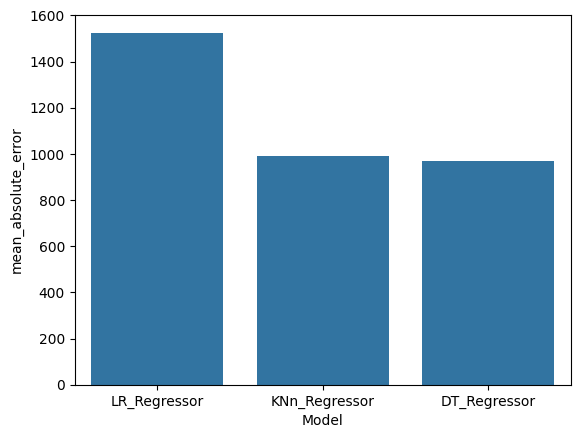

In [43]:
sns.barplot(data=df1,x="Model",y="mean_absolute_error")

<Axes: xlabel='Model', ylabel='TrainingTime'>

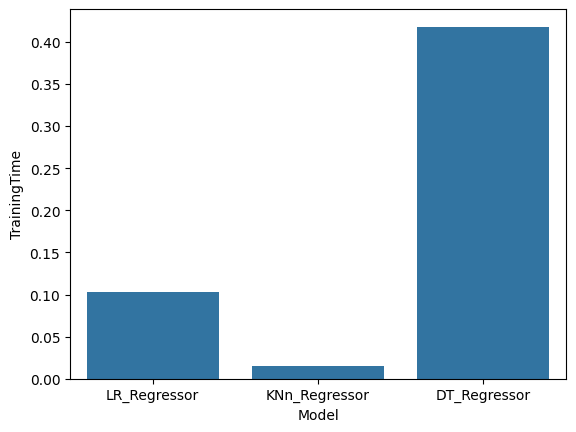

In [44]:
sns.barplot(data=df1,x="Model",y="TrainingTime")

<Axes: xlabel='Model', ylabel='PredictionTime'>

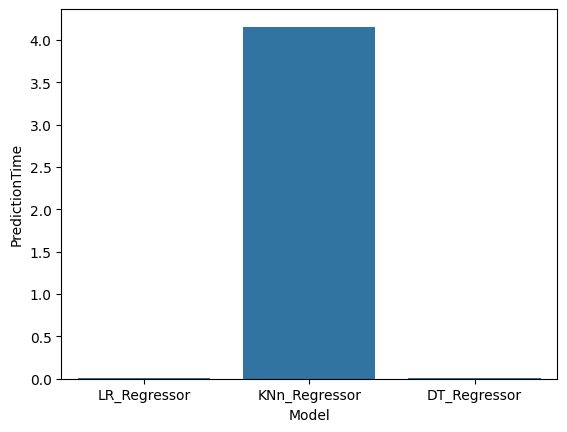

In [45]:
sns.barplot(data=df1,x="Model",y="PredictionTime")